# 3 Exploratory Data Analysis

### 3.1 Import Files and Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
filename = '../Step 2 - Data Wrangling/heart_cleveland_original.csv'
df = pd.read_csv(filename)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## 3.2 Description of our Data

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [44]:
NoDiseaseData = df[df['condition'] == 0]
NoDiseaseData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,160.000000,160.000000,160.000000,160.00000,160.00000,160.000000,160.00000,160.000000,160.000000,160.00000,160.000000,160.000000,160.000000,160.0
mean,52.643750,0.556250,1.793750,129.17500,243.49375,0.143750,0.84375,158.581250,0.143750,0.59875,0.412500,0.275000,0.375000,0.0
std,9.551151,0.498386,0.925508,16.37399,53.75755,0.351938,0.98764,19.043304,0.351938,0.78716,0.597558,0.633945,0.758599,0.0
min,29.000000,0.000000,0.000000,94.00000,126.00000,0.000000,0.00000,96.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,44.750000,0.000000,1.000000,120.00000,208.75000,0.000000,0.00000,149.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
50%,52.000000,1.000000,2.000000,130.00000,235.50000,0.000000,0.00000,161.000000,0.000000,0.20000,0.000000,0.000000,0.000000,0.0
75%,59.000000,1.000000,2.000000,140.00000,268.25000,0.000000,2.00000,172.000000,0.000000,1.10000,1.000000,0.000000,0.000000,0.0
max,76.000000,1.000000,3.000000,180.00000,564.00000,1.000000,2.00000,202.000000,1.000000,4.20000,2.000000,3.000000,2.000000,0.0


In [45]:
DiseaseData = df[df['condition'] == 1]
DiseaseData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263,1.0
std,7.899670,0.387658,0.828201,18.896730,49.679937,0.354387,0.976924,22.710673,0.500215,1.305006,0.567474,1.018506,0.882904,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,53.000000,1.000000,3.000000,120.000000,218.000000,0.000000,0.000000,125.000000,0.000000,0.600000,0.000000,0.000000,0.000000,1.0
50%,58.000000,1.000000,3.000000,130.000000,253.000000,0.000000,2.000000,142.000000,1.000000,1.400000,1.000000,1.000000,2.000000,1.0
75%,62.000000,1.000000,3.000000,145.000000,284.000000,0.000000,2.000000,157.000000,1.000000,2.500000,1.000000,2.000000,2.000000,1.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.0


Let's start with looking at a description of our data then looking at it for patients with no heart disease and pateint's with it. Looking at age, we can see that the mean is different by about 4 years and the median is different by about 6 years. Looking at chest pain(cp), 75% of our data for patients that don't have heart disease are less than a 2 while 25% of our heart disease patients have a value less than a 3. This tells us that 3 occurs more frequently in heart disease patients. We see restecg has a mean difference of 0.31 and we see a similar situation in our percentiles, where 50% of the data is less than 0 for patients with no heart disease while heart disease patients sit at a 2. This tells us we should see higher values of restecg for patients with heart disease. Lastly, the thal column has a significant different in median and mean as well. With a mean difference of 1 unit and 75% of patients without heart disease falling below 0 while 50% of patients fall below 2. 

From this, the columns that stick out are cp, restecg, and thal. While other columns have differences in means and percentiles, these ones have large gaps between them and stick out more than the others. We will be looking at histograms of our data to confirm the higher frequencies for certain data depending on if the patient has heart disease or not.

### 3.3 Looking at Relations between Sex, Age and Heart Disease

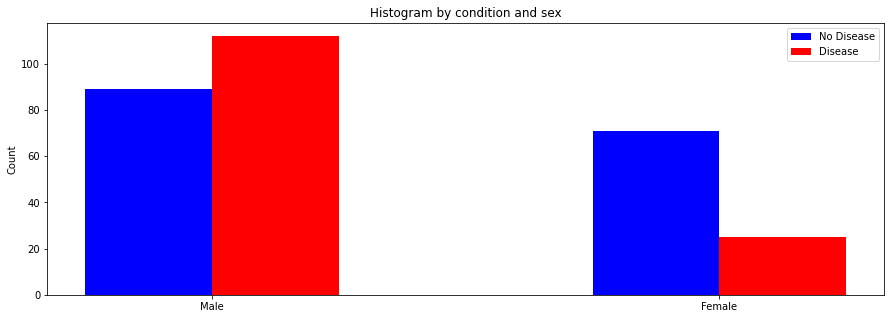

In [9]:
Labels = ['Male','Female']
x = np.arange(len(Labels))

NoDiseaseData = [df[(df['condition'] == 0) & (df['sex'] == 1)]['condition'].count(),df[(df['condition'] == 0) & (df['sex'] == 0)]['condition'].count()]
DiseaseData = [df[(df['condition'] == 1) & (df['sex'] == 1)]['condition'].count(),df[(df['condition'] == 1) & (df['sex'] == 0)]['condition'].count()]

width = 0.25
fig, ax = plt.subplots()

ax.bar(x - width/2, NoDiseaseData, width, label = 'No Disease', color = 'b')
ax.bar(x + width/2, DiseaseData, width, label = 'Disease', color='r')

fig.set_figheight(5)
fig.set_figwidth(15)

ax.set_ylabel('Count')
ax.set_title('Histogram by condition and sex')
ax.set_xticks(x)
ax.set_xticklabels(Labels)
ax.legend()
plt.show()

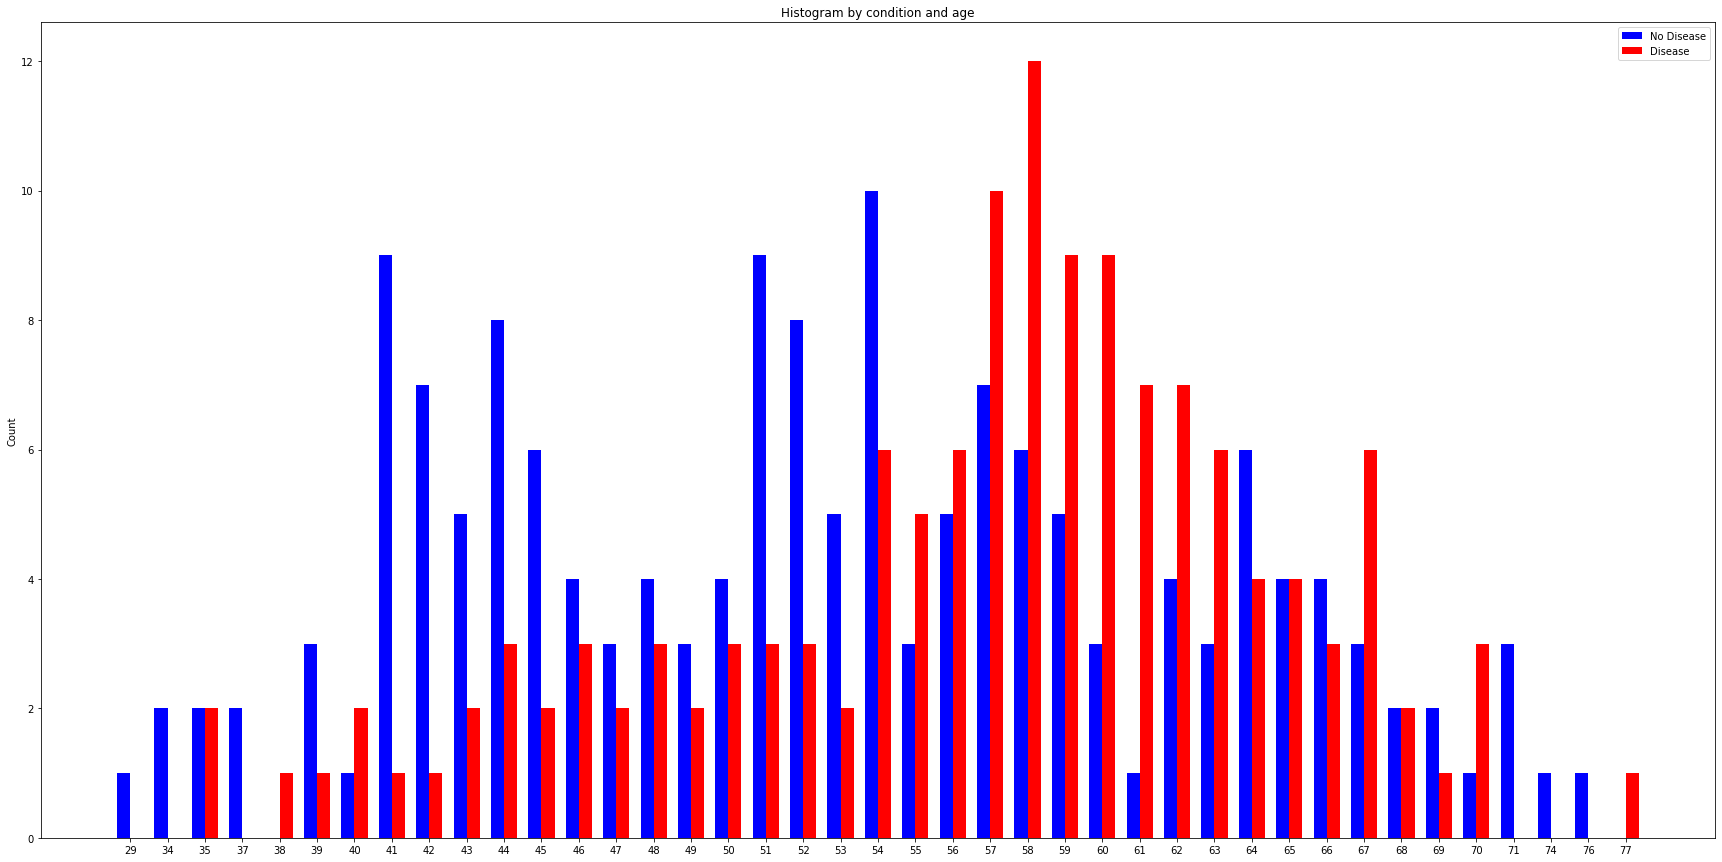

In [15]:
Labels = np.sort(df['age'].unique())
x = np.arange(len(Labels))

NoDiseaseData = df[df['condition'] == 0].groupby('age')['condition'].count()
DiseaseData = df[df['condition'] == 1].groupby('age')['condition'].count()

for i in Labels :
    if i not in NoDiseaseData.index :
        NoDiseaseData.loc[i] = 0
    if i not in DiseaseData.index :
        DiseaseData.loc[i] = 0
        
NoDiseaseData.sort_index(inplace=True)
DiseaseData.sort_index(inplace=True)

fig, ax = plt.subplots()
width = 0.35

ax.bar(x - width/2, NoDiseaseData, width, label = 'No Disease',color='b')
ax.bar(x + width/2, DiseaseData, width, label = 'Disease',color='r')

fig.set_figheight(15)
fig.set_figwidth(30)

ax.set_ylabel('Count')
ax.set_title('Histogram by condition and age')
ax.set_xticks(x)
ax.set_xticklabels(Labels)
ax.legend()
plt.show()

Taking a closer look at how sex and age have a relation with heart disease, we look at a histogram to count the number of patient's with heart disease in a category. Those being marked in red while those without heart disease are denoted with blue. Looking at sex, we noticed there tends to be more males with heart disease than there are women with it.

Looking at age, we see that it is much more frequent in older people than younger people. There is a spike between the ages of 54 and 58. Afterwards, it starts to decrease around the age of 64. It is possible that this dip is caused by people dying early due to heart disease, leaving the remaining people those who didn't catch it earlier on.

## 3.4 Correlation

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64


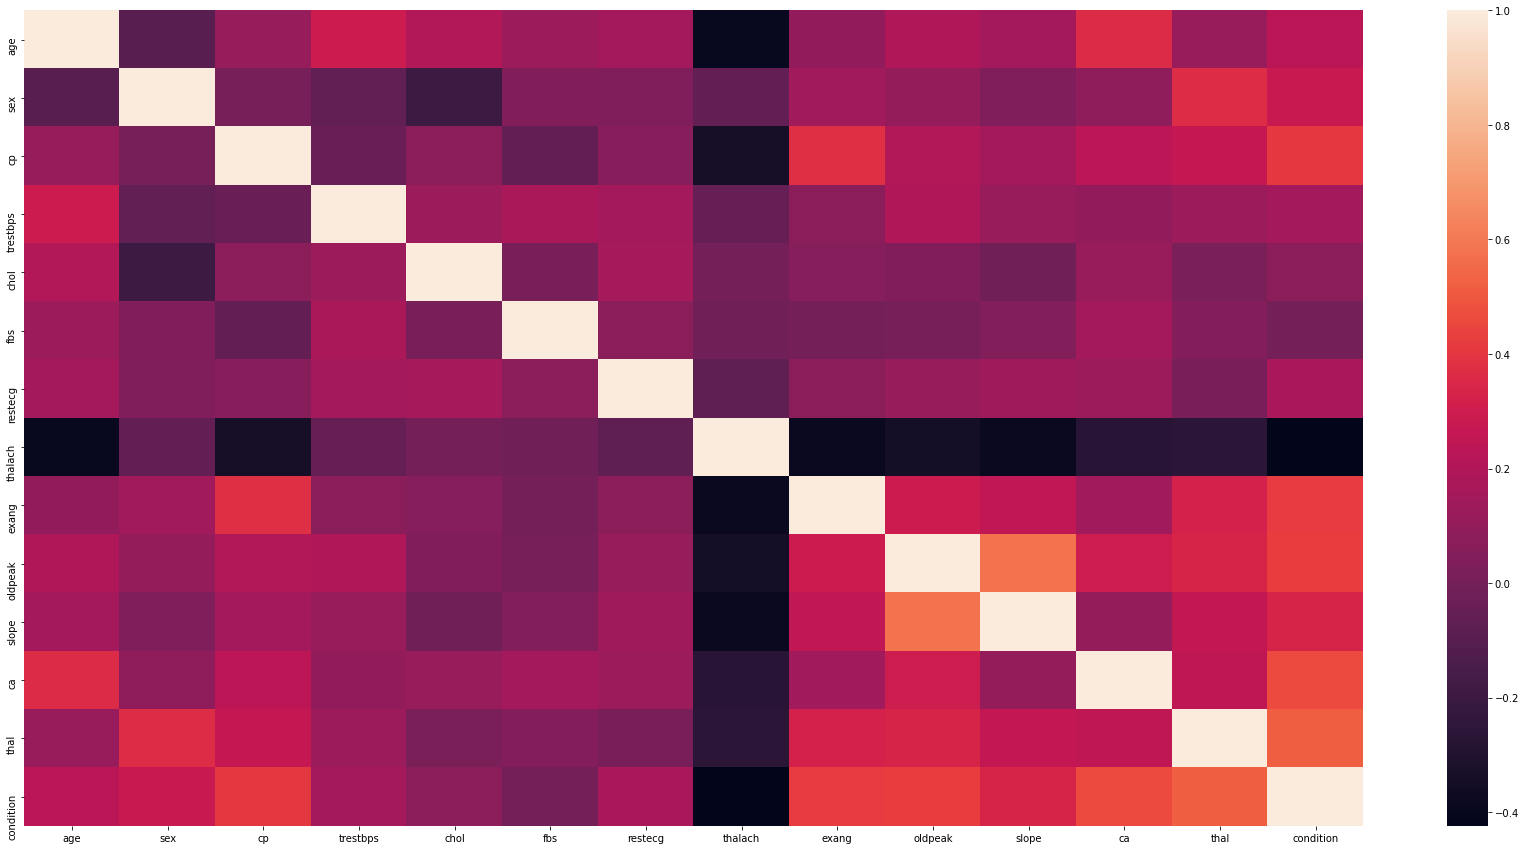

In [48]:
print(df.corr()['condition'].sort_values(ascending=False))

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(30)

sns.heatmap(df.corr(),ax=ax)
plt.show()

Looking at a heatmap of the correlations between columns, we can see that exang, oldpeak, cp, ca and thal have the most positive correlation on the condition feature. While it's not the strongest for some features, they seem to be close to 0.5 and stronger than other features. cp and thal we noticed looking at the mean and median above so it's good to see something else that highlights these features. We also notice that thalach has a pretty strong negative correlation with the condition of our patient.

## 3.5 Scatter plot of Features

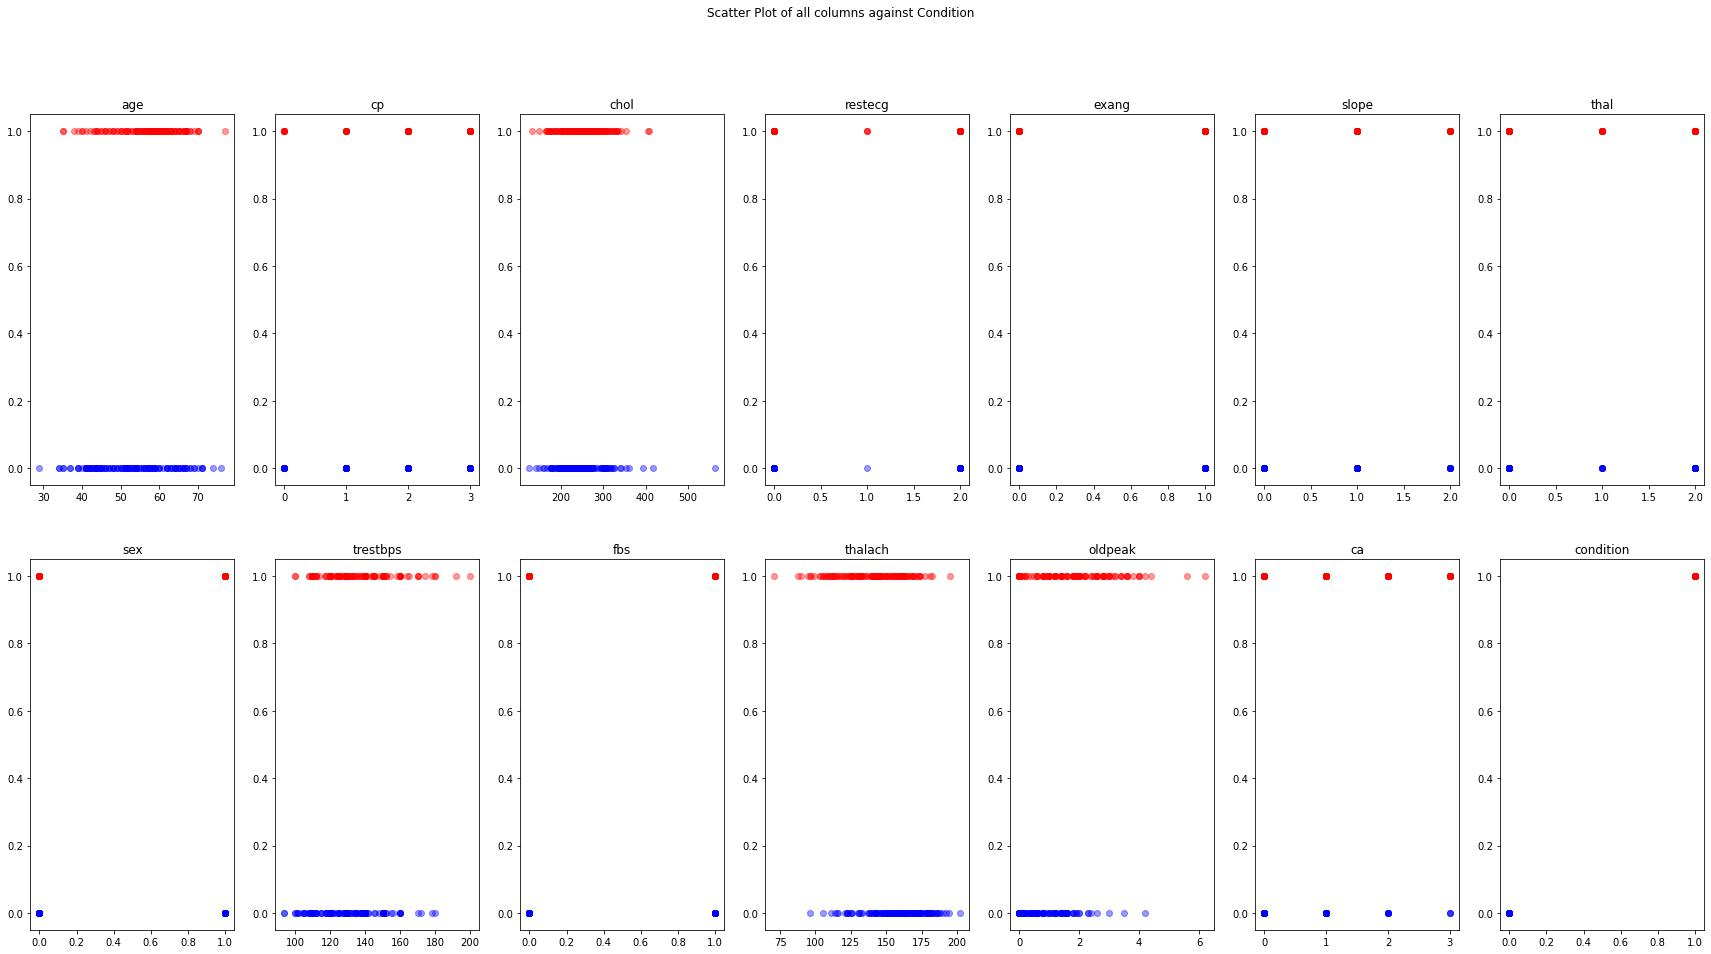

In [40]:
fig, axs = plt.subplots(2,7)
counter = 0

for i in range(0,7):
    for j in range(0,2):
        columnname = df.columns[counter]
        
        NoDisease = df[df['condition'] == 0]
        Disease = df[df['condition'] == 1]
        
        axs[j,i].scatter(NoDisease[columnname], NoDisease['condition'],alpha=0.4,color='b')
        axs[j,i].scatter(Disease[columnname], Disease['condition'],alpha=0.4,color='r')
        axs[j,i].title.set_text(columnname)
        counter += 1

fig.suptitle('Scatter Plot of all columns against Condition')
fig.set_figheight(15)
fig.set_figwidth(30)

Looking at a scatter plot, no obvious relations are noticed. It is especially difficult on other categorical data. Some minor patterns noticed are in "thalach", "trestbps" and "oldpeak".
Looking at those columns, we can see some stretches where the data point exists where it doesn't reflect on the other label. For example, looking at "thalach" we can see that there are more points near a lower value that have heart disease than those that do not. For "trestbps", we can see more data points towards higher values and the same for old peak. Let's take a look at a histogram for each column but separated by column.

## 3.6 Histogram of Features

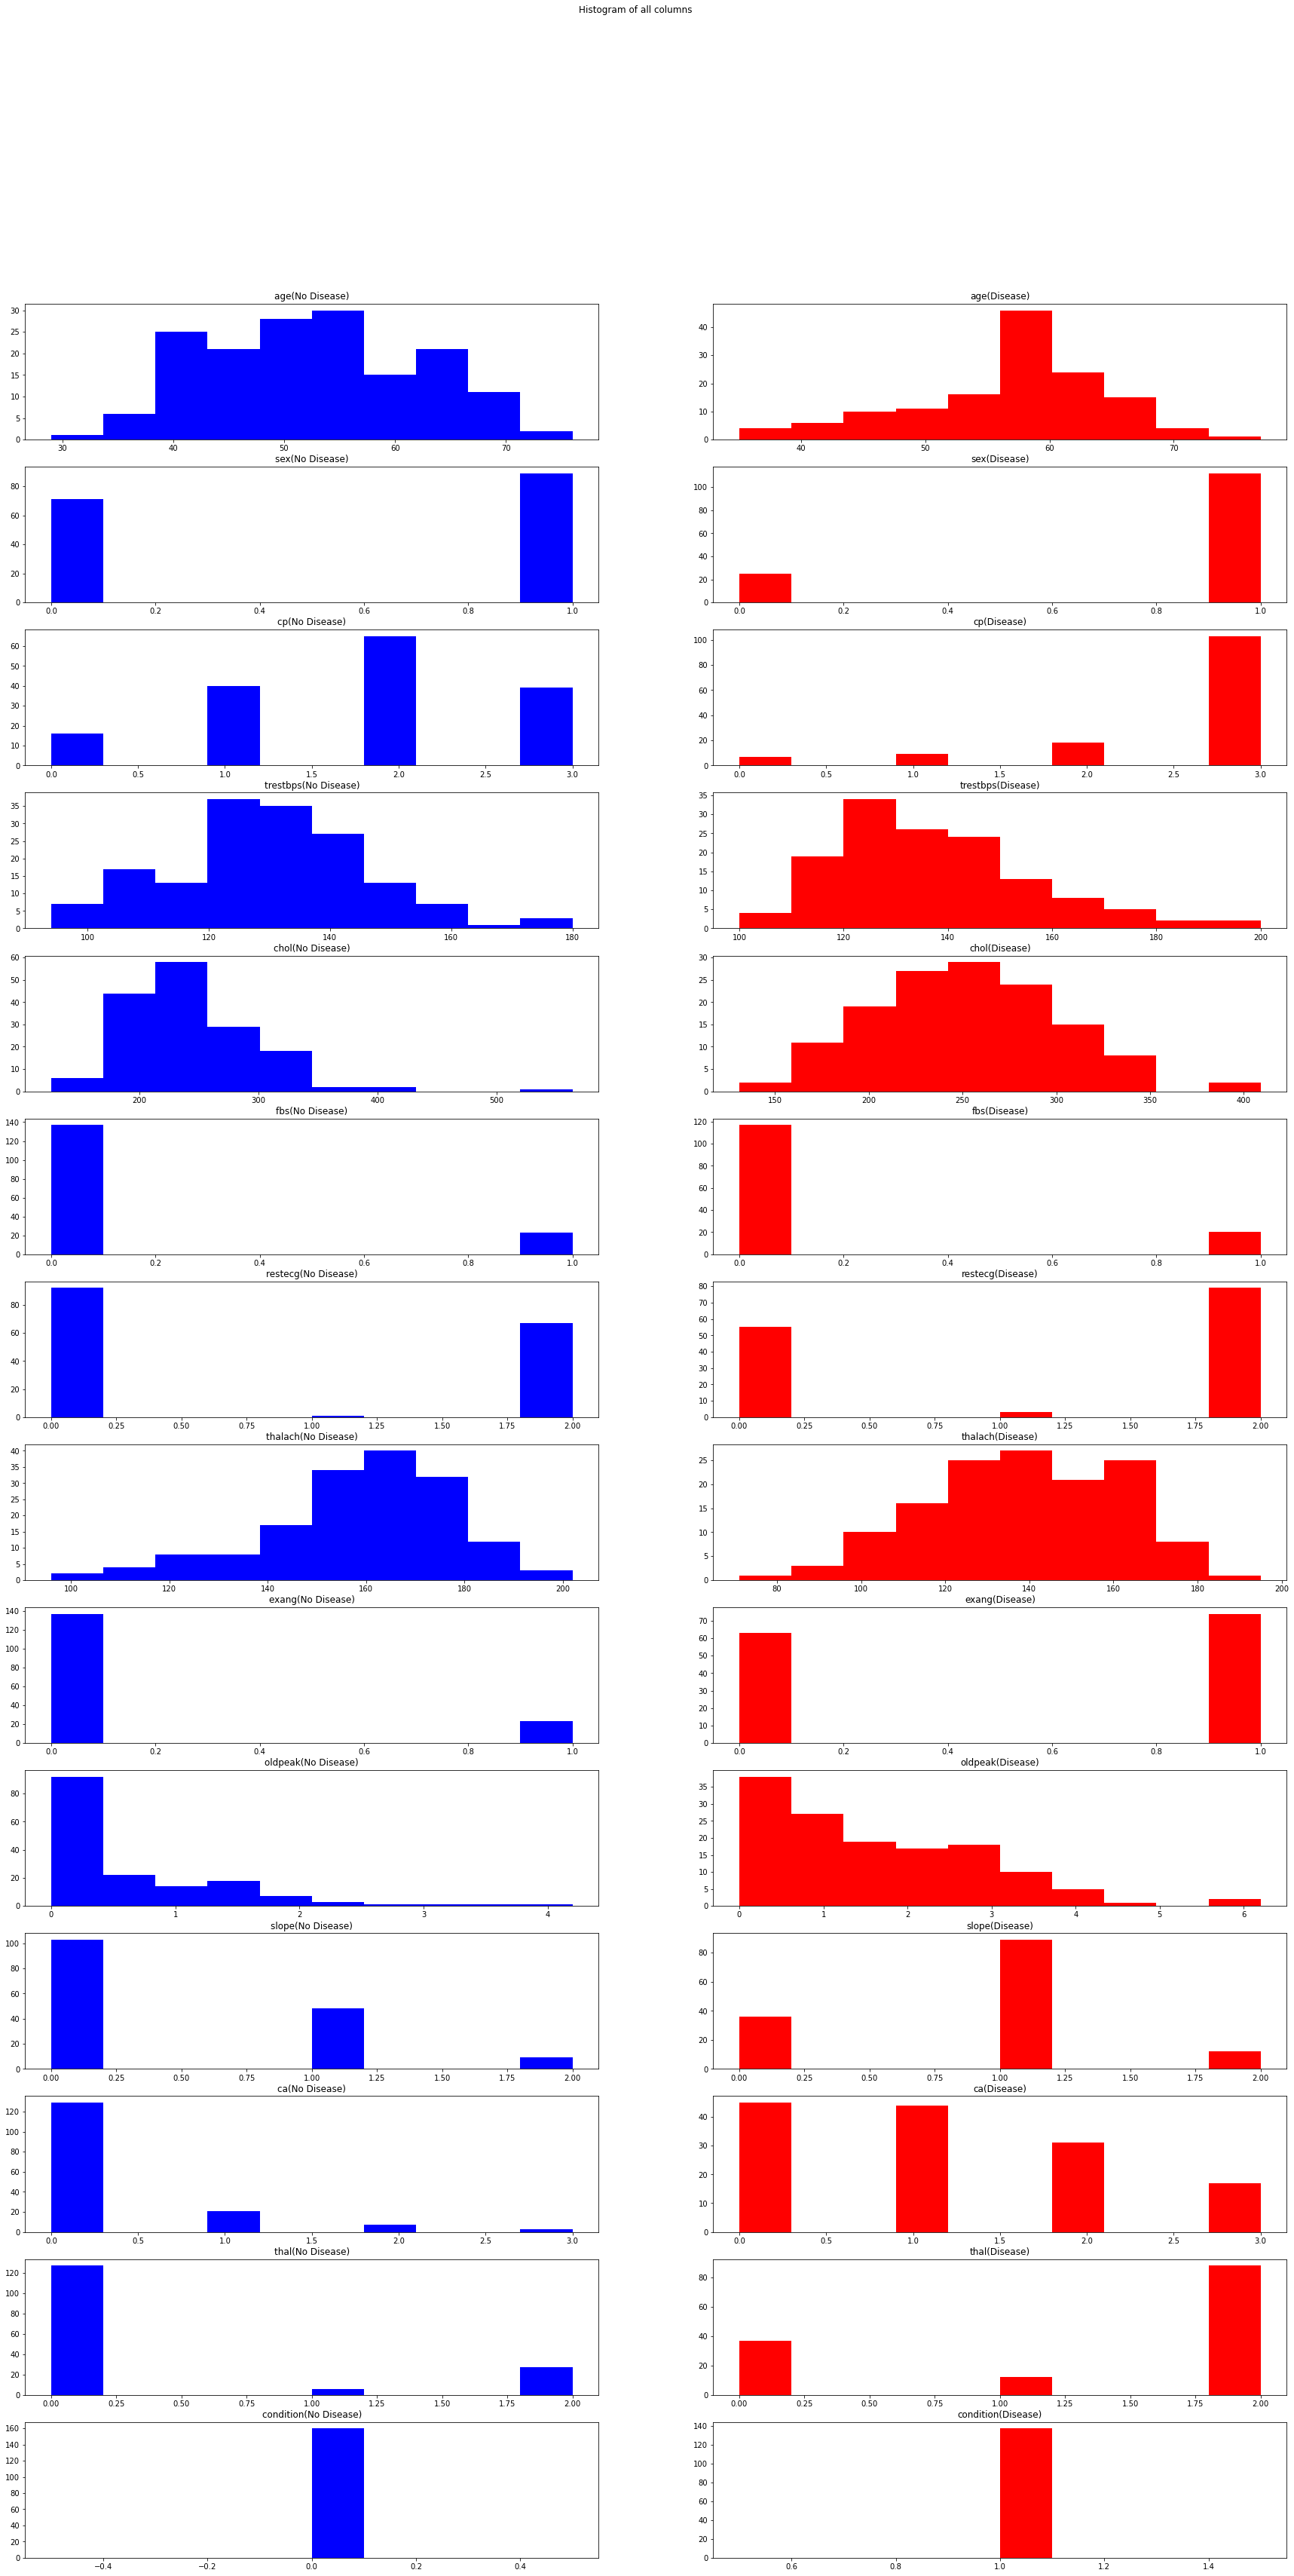

In [38]:
fig, axs = plt.subplots(14,2)
counter = 0

for i in range(0,14):
    for j in range(0,2):
        columnname = df.columns[counter]
        
        if j == 0 :
            condition = 0
            color = 'b'
            label = 'No Disease'
        else :
            condition = 1
            color = 'r'
            label = 'Disease'
            
        Data = df[df['condition'] == condition][columnname]
        
        axs[i,j].hist(Data,bins = 10, color=color)
        axs[i,j].title.set_text(columnname + '(' + label + ')')
        
    counter += 1

fig.suptitle('Histogram of all columns')
fig.set_figheight(55)
fig.set_figwidth(30)
plt.show()

Looking at a histogram shows us a lot more interesting patterns. Starting at chest pain(cp), we see the value 3 appear more frequently in patients with heart disease than any other value, which signifies the patient is experiencing typical angina. For "trestbps", we see that patients with heart disease tend to have a bit higher values, similar to what was observed in the scatter plot. "restecg" we see more values tend towards 2 for patients with heart disease. We notice a large increase in "exang" for patients with heart disease, with 1 occurring much more frequently. "Oldpeak" shows us the values stretch across 1-6 a lot more in heart disease patients. "Slope" shows a lot more values around 1 and "thal" shows a higher frequency for the value of 2.

Looking at histograms, we see a lot more noticable patterns with the data. Additionaly, we've seen the columns "cp", "exang","trestbps" and "oldpeak" come up repeatedly in our investigations.

## 3.7 PCA to Visaulize Higher Dimensions

In [81]:
scaledData = scale(df.drop('condition',axis=1))
scaledDF = pd.DataFrame(scaledData,columns = df.drop('condition',axis=1).columns)

scaledDF.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.600302,0.691095,-2.240629,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292
1,1.600302,-1.446980,-2.240629,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292
2,1.268242,-1.446980,-2.240629,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292
3,1.157555,0.691095,-2.240629,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292
4,1.046868,0.691095,-2.240629,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292


Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for state/resort summary statistics')

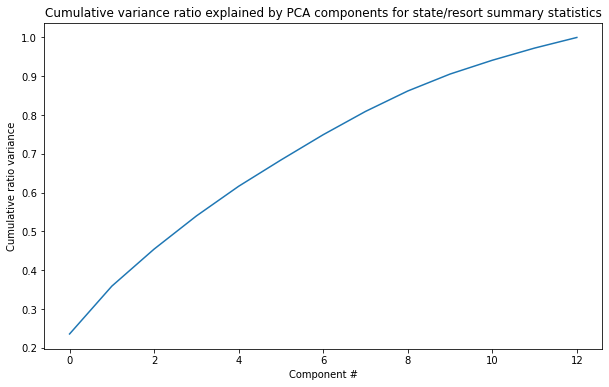

In [83]:
model = PCA()
model.fit(scaledDF)

plt.subplots(figsize=(10, 6))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics')

In [93]:
PCAData = model.transform(scaledDF)

x = PCAData[:,0]
y = PCAData[:,1]

xDF = pd.DataFrame(x, columns = ['X'])
yDF = pd.DataFrame(y, columns= ['Y'])

PCADF = pd.concat([xDF,yDF,df[['condition']]],axis=1)
PCADF.head()

,X,Y,condition
0,0.267692,2.515312,0
1,-0.669153,2.026842,0
2,0.701191,1.298272,0
3,-0.282020,2.265496,1
4,0.126575,-0.401644,0


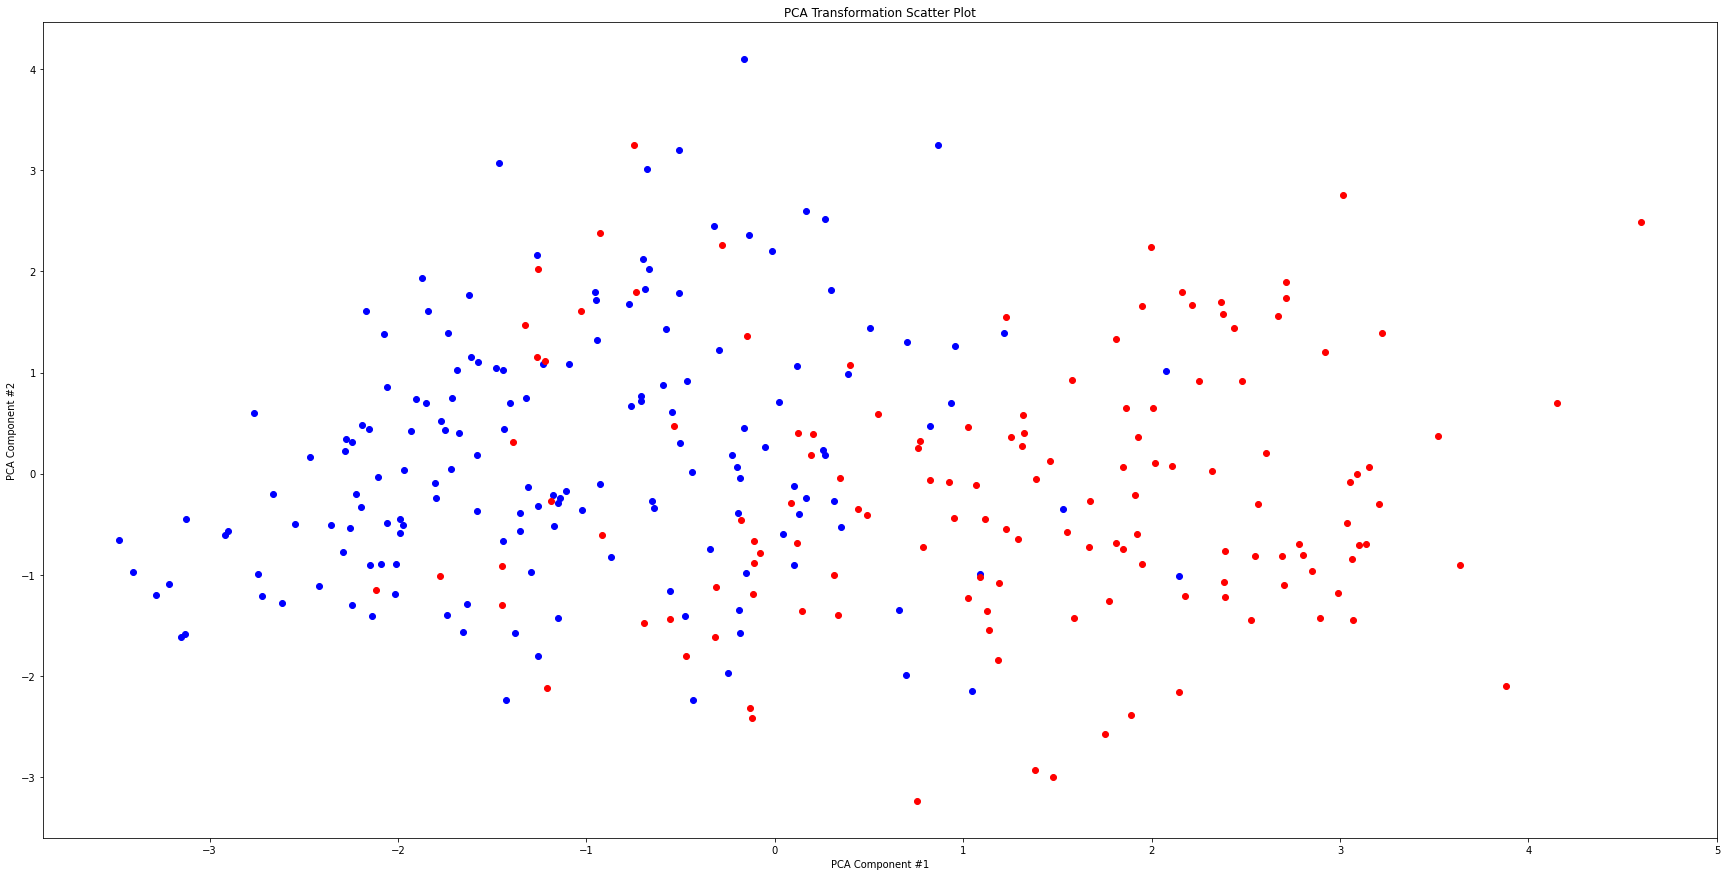

In [97]:
NoDiseaseData = PCADF[PCADF['condition'] == 0]
DiseaseData = PCADF[PCADF['condition'] == 1]

plt.subplots(figsize=(30,15))
plt.scatter(NoDiseaseData['X'],NoDiseaseData['Y'], color='b')
plt.scatter(DiseaseData['X'],DiseaseData['Y'], color='r')
plt.xlabel('PCA Component #1')
plt.ylabel('PCA Component #2')
plt.title('PCA Transformation Scatter Plot')
plt.show()

Lastly, let's try to see if we can notice some pattern that PCA is able to point out. We start by scaling and then applying the PCA transformation. Looking at our variance, two components is able to exlpain 40% of the variability and four components covers about 60% of it. It's pretty difficult to visualize four components in a single graph so we took a look at just the first two components. We can see a lot of mixture between patients with heart disease and those without but we also notice that heart disease patients tend towards positive values of PCA Component 1 while patients without heart disease tend towards negative values. The plot shown doesn't give an easy line to draw where we can separate heart disease patients but it does give us an interesting pattern seeing that some of the patients are separated based on whether they have the disease towards the edges of the plot.

## 3.8 Conclusion

We have found many interesting patterns but nothing definitive that can help us pin point heart disease easily. While most of the analysis here has been one feature at a time, it gives us some positive insight that our models may be able to find something across all the features. We have seen patterns in certain features such as "cp", "exang","trestbps" and "oldpeak" and will continue to observe their importance during model selection. We have seen minor trends across sex with males tending to having a higher chance to get heart disease, as well as older patients so these values may show to be important as well. Last, we attempted to visualize our scaled data with a PCA transformation to see if there is any explanation of variability and pattern in the data with the first two components. The first two components had somewhat low variability, we did notice an interesting but not too useful trend with heart disease having positive PCA component 1 values and patients without heart disease having negative values.